In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(11.7,8.27)})

SAMPLE_SIZE = 300

RAI_ARTISTS = ['Cheb Hasni']# ['Cheb Hasni', 'Cheb Mami']
POP_ARTISTS = ['Idir'] # ['Idir', 'Kamel Messaoudi', 'El Hachemi Guerouabi']
ARTISTS = []
ARTISTS.extend(RAI_ARTISTS)
ARTISTS.extend(POP_ARTISTS)

In [2]:
df = pd.read_csv('rai.csv')

## Analyze Hasni's data

In [3]:
df = df[df.main_artist.isin(RAI_ARTISTS)]
df = df.sample(n = min(len(df), SAMPLE_SIZE))
df = df.drop_duplicates(subset=['duration_ms_x'], keep='first')
df.to_csv('hasni.csv')
df.shape

(197, 19)

<AxesSubplot:xlabel='popularity', ylabel='Count'>

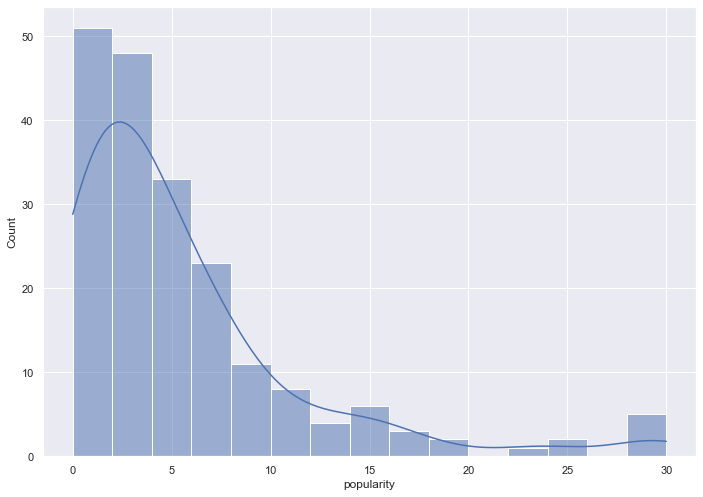

In [4]:
sns.histplot(data=df, x="popularity", kde=True)


## Compare with other datasets

In [5]:
pop_df = pd.read_csv('pop.csv')
pop_df = pop_df[pop_df.main_artist.isin(POP_ARTISTS)]
pop_df = pop_df.sample(n = min(SAMPLE_SIZE, len(pop_df)))
frames = [df, pop_df]
df = pd.concat(frames)
df.head()

,id,name,main_artist,key,mode,time_signature,duration_ms_x,danceability,loudness,energy,instrumentalness,liveness,valence,speechiness,tempo,popularity,youtube_views,last_fm_playcount,last_fm_listeners
1586,5sVwHCjUrR7brs2HodXrKj,Ouach etsalini,Cheb Mami,0,0,4,282013,0.538,-6.007,0.687,0.000000,0.0782,0.859,0.0400,93.172,2,205534.0,1620,964
1260,4Ls3xuirun4ZrLoJJo6e0Y,ديريها في بالك,Cheb Hasni,7,0,4,326093,0.714,-8.005,0.782,0.062800,0.1030,0.895,0.0370,91.626,3,254672.0,89,6
617,13oEyKXwLj2pCBqDEOpPV2,محمد العنزيl,Cheb Mami,7,1,4,342386,0.532,-3.795,0.711,0.007090,0.0477,0.935,0.0344,168.743,7,51.0,6,4
1005,2OyVD9AHj9eCg65lPsh8jQ,Je m'en fous,Cheb Mami,7,1,4,365106,0.772,-8.168,0.722,0.000000,0.9630,0.773,0.0718,111.987,4,86445273.0,0,0
898,0yzjGSmgyGzVGum0pECKuC,Tayo Tayo Adiani,Cheb Mami,7,0,4,328440,0.599,-6.793,0.745,0.000065,0.0924,0.904,0.0525,164.099,5,7743.0,915,546


In [6]:
# NORMALIZE BY SINGER & RANDOMLY PICK SAME SIZE OF SONGS (random based on popularity)
pop_columns = ['popularity', 'youtube_views', 'last_fm_playcount']

artists = ARTISTS
df[pop_columns].fillna(0)

df[pop_columns] = (df[pop_columns] - df[pop_columns].min()) / (df[pop_columns].max() - df[pop_columns].min())


In [7]:
for artist in artists:
    art_df = df.loc[df.main_artist == artist, : ] 
    art_df.head()
    art_df[pop_columns] = (art_df[pop_columns] - art_df[pop_columns].min()) / (art_df[pop_columns].max() - art_df[pop_columns].min())
    df.loc[df.main_artist == artist, : ] = art_df

/Users/belkacemberchiche/miniforge3/envs/.venv/lib/python3.9/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


<AxesSubplot:xlabel='popularity', ylabel='Count'>

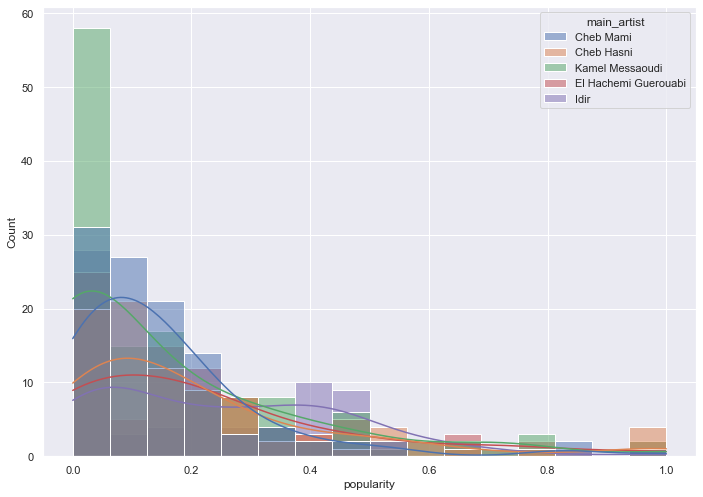

In [8]:

df = df[df.main_artist.isin(artists)]
sns.histplot(data=df, x="popularity", hue='main_artist', kde=True)

[Text(0, 0.5, 'Song popularity'), Text(0.5, 0, 'Artist')]

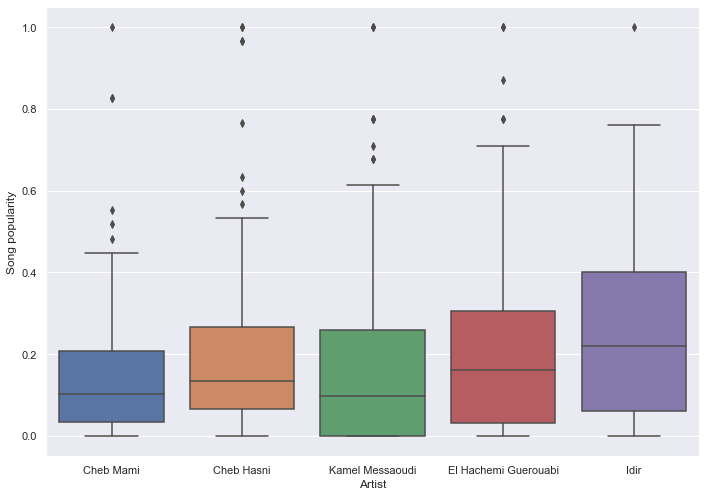

In [9]:
ax = sns.boxplot(x=df.main_artist, y=df.popularity)
ax.set(ylabel="Song popularity", xlabel="Artist")

## Audio feature variance

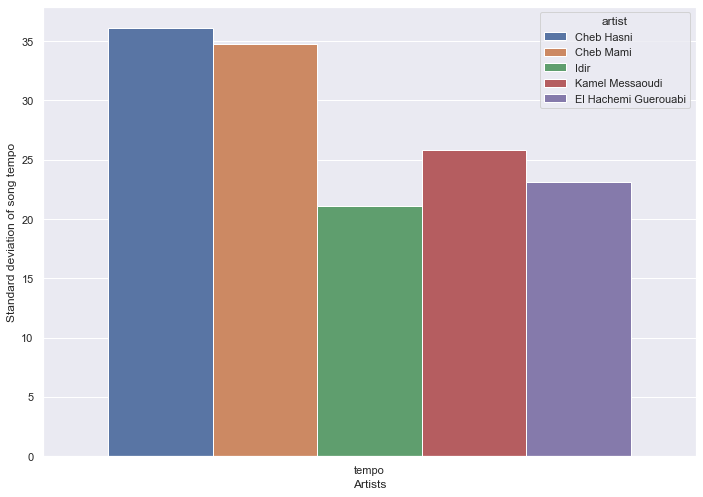

In [10]:
features_per_artist = []
musical_features = ['tempo'] # ['danceability', 'loudness', 'tempo']
for artist in artists:
    for column in df[df.main_artist == artist].columns:
        if column in musical_features:
            features_per_artist.append({'artist': artist, 'feature': column,
            'std': df[df.main_artist == artist][column].std()})

f_df = pd.DataFrame(features_per_artist)

ax = sns.barplot(data=f_df, hue="artist", x="feature", y="std", estimator=np.median)
ax.set(xlabel="Artists", ylabel="Standard deviation of song tempo")
plt.show(ax)

# TSNE or UMAP (like PCA - réduction de dimensions)